In [51]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [52]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [53]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [54]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


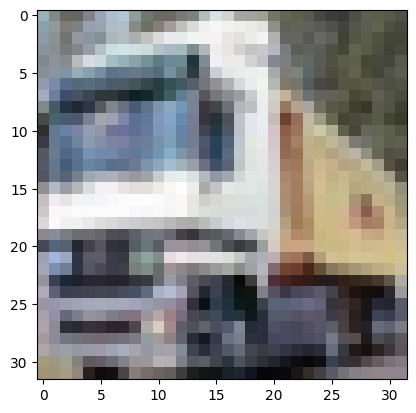

In [55]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [56]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [57]:

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
# check model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [68]:

history = model.fit(x=x_train,y=one_hot_y_train, batch_size=128,epochs=25,verbose=1)

Epoch 1/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 2/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0279 - accuracy: 0.9908
Epoch 3/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0338 - accuracy: 0.9900
Epoch 4/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 5/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0275 - accuracy: 0.9916
Epoch 6/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 7/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0244 - accuracy: 0.9922
Epoch 8/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0211 - accuracy: 0.9938
Epoch 9/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 10/25
391/391 [==============================] - 4s 11ms/step - loss: 0.0158 - accura

In [69]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 0s 8ms/step - loss: 1.5592 - accuracy: 0.7990


[1.5591590404510498, 0.7990000247955322]

1/1 [==============================] - 0s 28ms/step
predict class: 5
expected class: 5


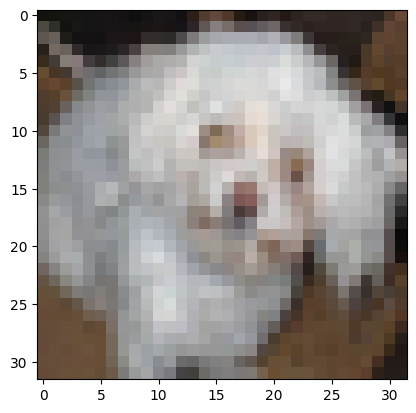

In [70]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [71]:
# save model
model.save("keras-VGG16-cifar10.h5")

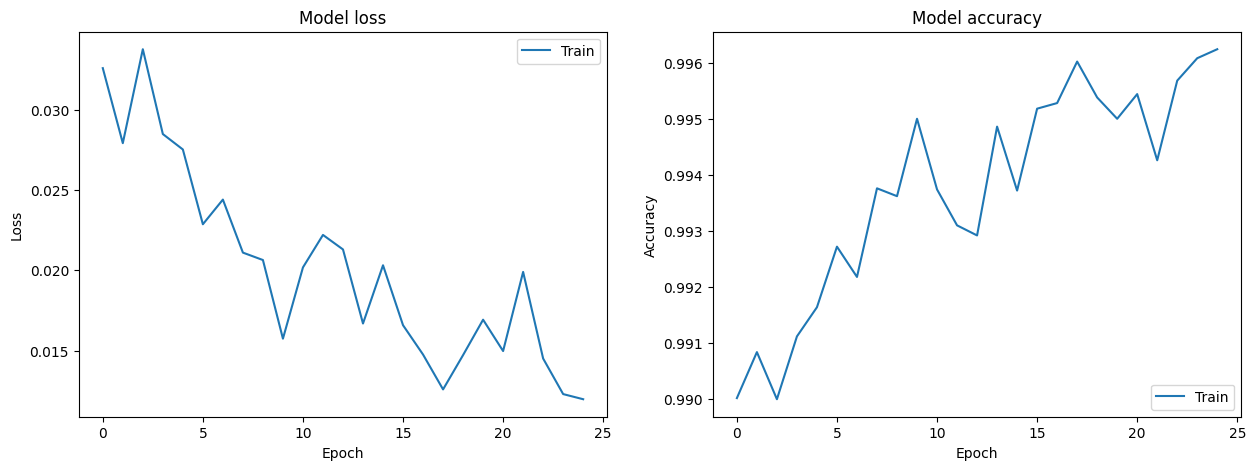

In [74]:
import matplotlib.pyplot as plt

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Model accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='lower right')

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].set_title('Model loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper right')

plt.show()


In [77]:
import numpy as np
y_predictions1 = model.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 3ms/step


array([[874,   7,  20,  11,   2,   2,   5,   6,  53,  20],
       [ 12, 914,   1,   0,   0,   1,   1,   0,  32,  39],
       [ 71,   5, 714,  58,  41,  35,  22,  19,  25,  10],
       [ 28,  10,  65, 636,  36, 122,  30,  21,  35,  17],
       [ 42,   7,  51,  66, 706,  34,  35,  44,  10,   5],
       [ 12,  11,  32, 141,  31, 723,   8,  28,   8,   6],
       [  7,   3,  40,  72,  19,  20, 803,   6,  25,   5],
       [ 17,   4,  21,  24,  29,  40,   4, 839,   7,  15],
       [ 37,   5,   5,   4,   2,   2,   2,   3, 925,  15],
       [ 21,  70,   4,   8,   0,   1,   3,   8,  29, 856]])

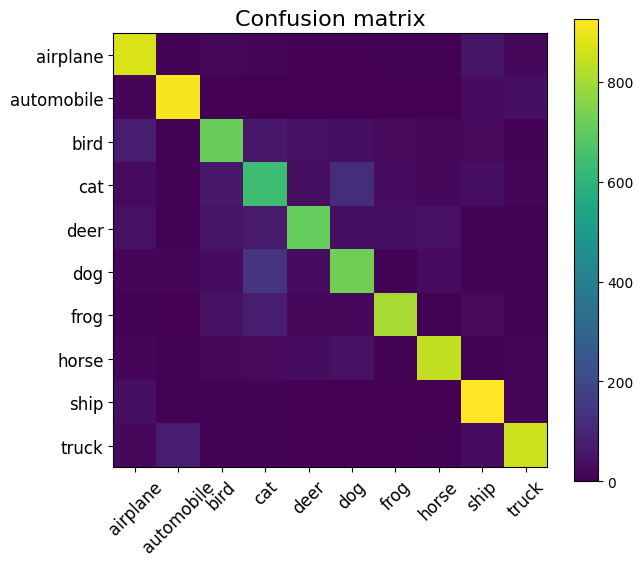

In [79]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 28ms/step


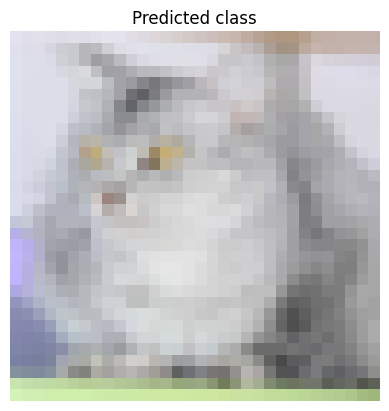

In [82]:
# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a random image from the test set
index = np.random.randint(0, x_test.shape[0])
image = x_test[index]

# Make a prediction on the image using the pre-trained model
prediction = model.predict(np.expand_dims(image, axis=0))
import tensorflow as tf

class_index = tf.argmax(prediction, axis=1)
class_name = tf.keras.utils.to_categorical(class_index, num_classes=10)
actual_class = y_test[index]

# Visualize the image and the predicted and actual classes
plt.imshow(image)
plt.title(f"Predicted class")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 156ms/step
predict class: 5
expected class: 5


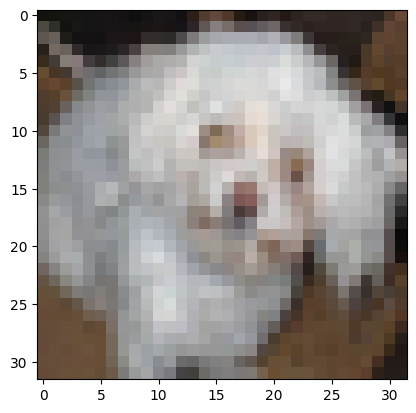

In [89]:
from keras.models import load_model
model = load_model('keras-VGG16-cifar10.h5')
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

